## Database connectivity 

In [1]:
import mysql.connector
import pandas as pd 

In [2]:
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Medhruv1104#",
    database="ecommerceschema"
)
print("connected")

connected


In [3]:
# Create a cursor object using the connection
cursor = connection.cursor()


In [4]:
# Example query
cursor.execute("Show tables")

# Fetch all results from the executed query
results = cursor.fetchall()

# Print results
for row in results:
    print(row)

# Close the cursor and connection



('customer',)
('order_details',)
('product',)


In [213]:
#fetching and converting into dataframes

In [5]:
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing first 5 records from each table


  customer_id          name       city                     email    phone_no  \
0     CUST001   Arjun Singh  New Delhi   arjun.singh@example.com  9876543210   
1     CUST002  Priya Sharma     Mumbai  priya.sharma@example.com  9988776655   
2     CUST003   Rahul Verma  Bangalore   rahul.verma@example.com  9123456789   
3     CUST004  Anjali Mehta    Chennai  anjali.mehta@example.com  9012345678   
4     CUST005   Vikas Gupta    Kolkata   vikas.gupta@example.com  9876543201   

                   address  pin_code  
0             123, MG Road    110001  
1  45, Lokhandwala Complex    400053  
2          56, Indiranagar    560038  
3              12, T Nagar    600017  
4             7, Salt Lake    700091  
  product_id            product_name     category   sub_category  \
0    PROD001      Samsung Galaxy S21  Electronics    Smartphones   
1    PROD002         Apple iPhone 13  Electronics    Smartphones   
2    PROD003  Sony Bravia 55-inch TV  Electronics    Televisions   
3    PROD004 

In [6]:
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,CUST001,Arjun Singh,New Delhi,arjun.singh@example.com,9876543210,"123, MG Road",110001
1,CUST002,Priya Sharma,Mumbai,priya.sharma@example.com,9988776655,"45, Lokhandwala Complex",400053
2,CUST003,Rahul Verma,Bangalore,rahul.verma@example.com,9123456789,"56, Indiranagar",560038
3,CUST004,Anjali Mehta,Chennai,anjali.mehta@example.com,9012345678,"12, T Nagar",600017
4,CUST005,Vikas Gupta,Kolkata,vikas.gupta@example.com,9876543201,"7, Salt Lake",700091


## EDA

In [8]:
customer_data.head()


,customer_id,name,city,email,phone_no,address,pin_code
0,CUST001,Arjun Singh,New Delhi,arjun.singh@example.com,9876543210,"123, MG Road",110001
1,CUST002,Priya Sharma,Mumbai,priya.sharma@example.com,9988776655,"45, Lokhandwala Complex",400053
2,CUST003,Rahul Verma,Bangalore,rahul.verma@example.com,9123456789,"56, Indiranagar",560038
3,CUST004,Anjali Mehta,Chennai,anjali.mehta@example.com,9012345678,"12, T Nagar",600017
4,CUST005,Vikas Gupta,Kolkata,vikas.gupta@example.com,9876543201,"7, Salt Lake",700091


In [9]:
product_data.head()


,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,PROD001,Samsung Galaxy S21,Electronics,Smartphones,69999.0,64999.0,50
1,PROD002,Apple iPhone 13,Electronics,Smartphones,79999.0,74999.0,40
2,PROD003,Sony Bravia 55-inch TV,Electronics,Televisions,59999.0,57999.0,25
3,PROD004,Dell XPS 13,Electronics,Laptops,99999.0,94999.0,30
4,PROD005,Nike Air Max 270,Footwear,Running Shoes,12999.0,11999.0,100


In [10]:
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,CUST001,PROD001,1.0,64999.0,Credit Card,2024-08-01 10:00:00,Shipped
1,2,CUST002,PROD002,1.0,74999.0,Debit Card,2024-08-02 11:15:00,Delivered
2,3,CUST003,PROD003,1.0,57999.0,Net Banking,2024-08-03 12:30:00,Processing
3,4,CUST004,PROD004,1.0,94999.0,Credit Card,2024-08-04 13:45:00,Shipped
4,5,CUST005,PROD005,2.0,23998.0,Cash on Delivery,2024-08-05 14:00:00,Delivered


### data cleaning 

In [12]:
#looking for any null values 

In [11]:
customer_data.isna().sum().sum()

0

In [15]:
customer_data.isna().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [13]:
order_data.isna().sum().sum()

0

In [16]:
order_data.isna().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [14]:
product_data.isna().sum().sum()

0

In [17]:
product_data.isna().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [18]:
#no null values or missing value found

In [19]:
#looking for any duplicate values

In [21]:
customer_data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [22]:
customer_data.duplicated().sum()

0

In [23]:
product_data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [24]:
product_data.duplicated().sum()

0

In [25]:
order_data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [26]:
order_data.duplicated().sum()

0

In [27]:
#therefore no duplicated value found 

In [28]:
#our data is good to proceed for analysis 

### data analysis 

#### Customer Analysis 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Total Number of Customers City-wise

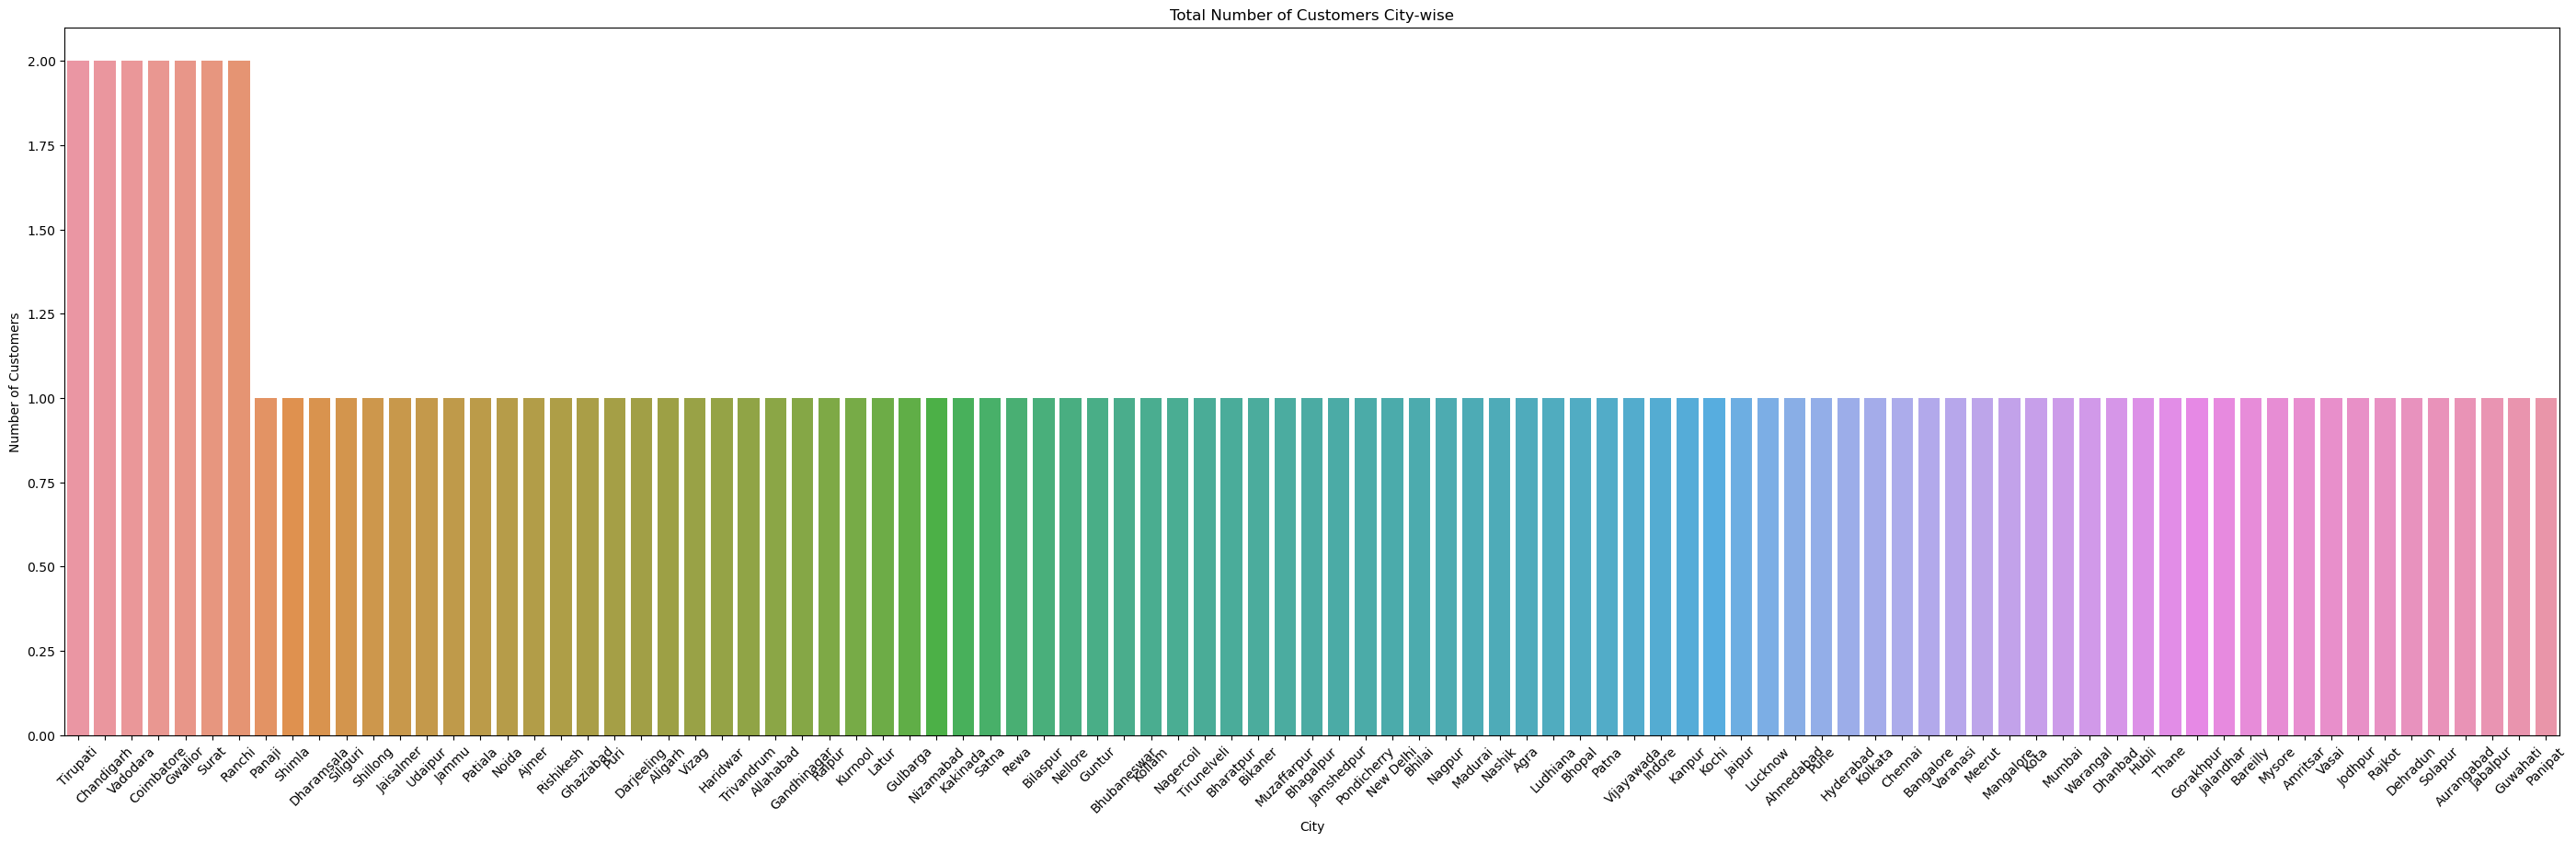

In [36]:
city_wise_customers = customer_data['city'].value_counts()

plt.figure(figsize=(35, 10))
sns.barplot(x=city_wise_customers.index, y=city_wise_customers.values)
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [38]:
#Most Frequent Customers Based on Order History

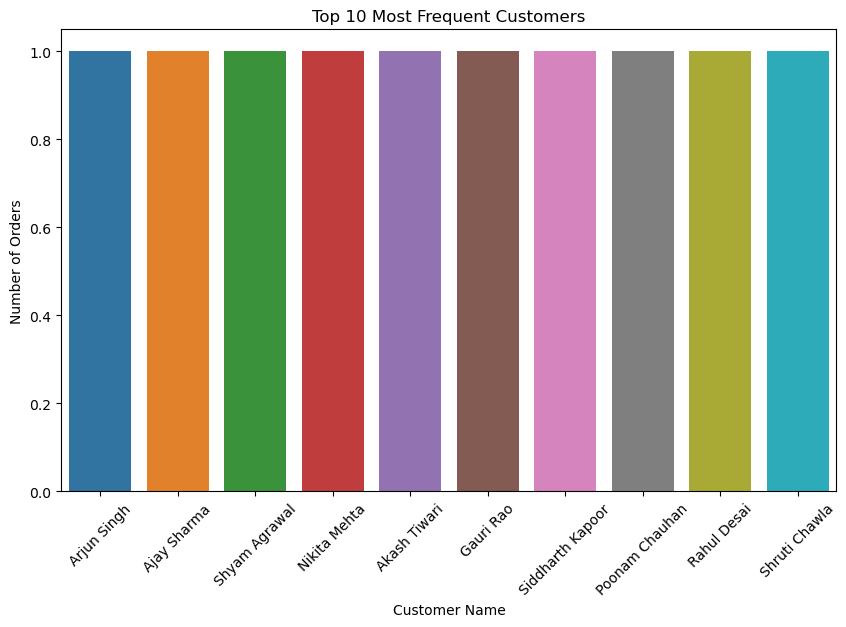

In [42]:
frequent_customers = order_data['customer_id'].value_counts().head(10)
# Then, map these customer IDs to their respective names from the customer_df
frequent_customers_names = frequent_customers.index.to_series().map(customer_data.set_index('customer_id')['name'])
plt.figure(figsize=(10, 6))
sns.barplot(x=frequent_customers_names, y=frequent_customers.values)
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### Product Analysis 

In [43]:
# Total Number of Products by Category

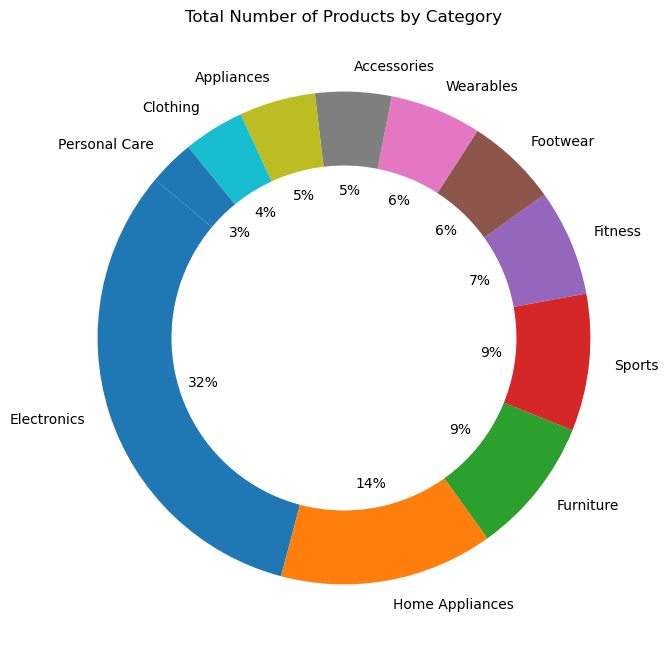

In [48]:
products_by_category = product_data['category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(products_by_category, labels=products_by_category.index, autopct='%1.0f%%',startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Total Number of Products by Category')
plt.show()


In [49]:
# Distribution of Products Across Sub-categories

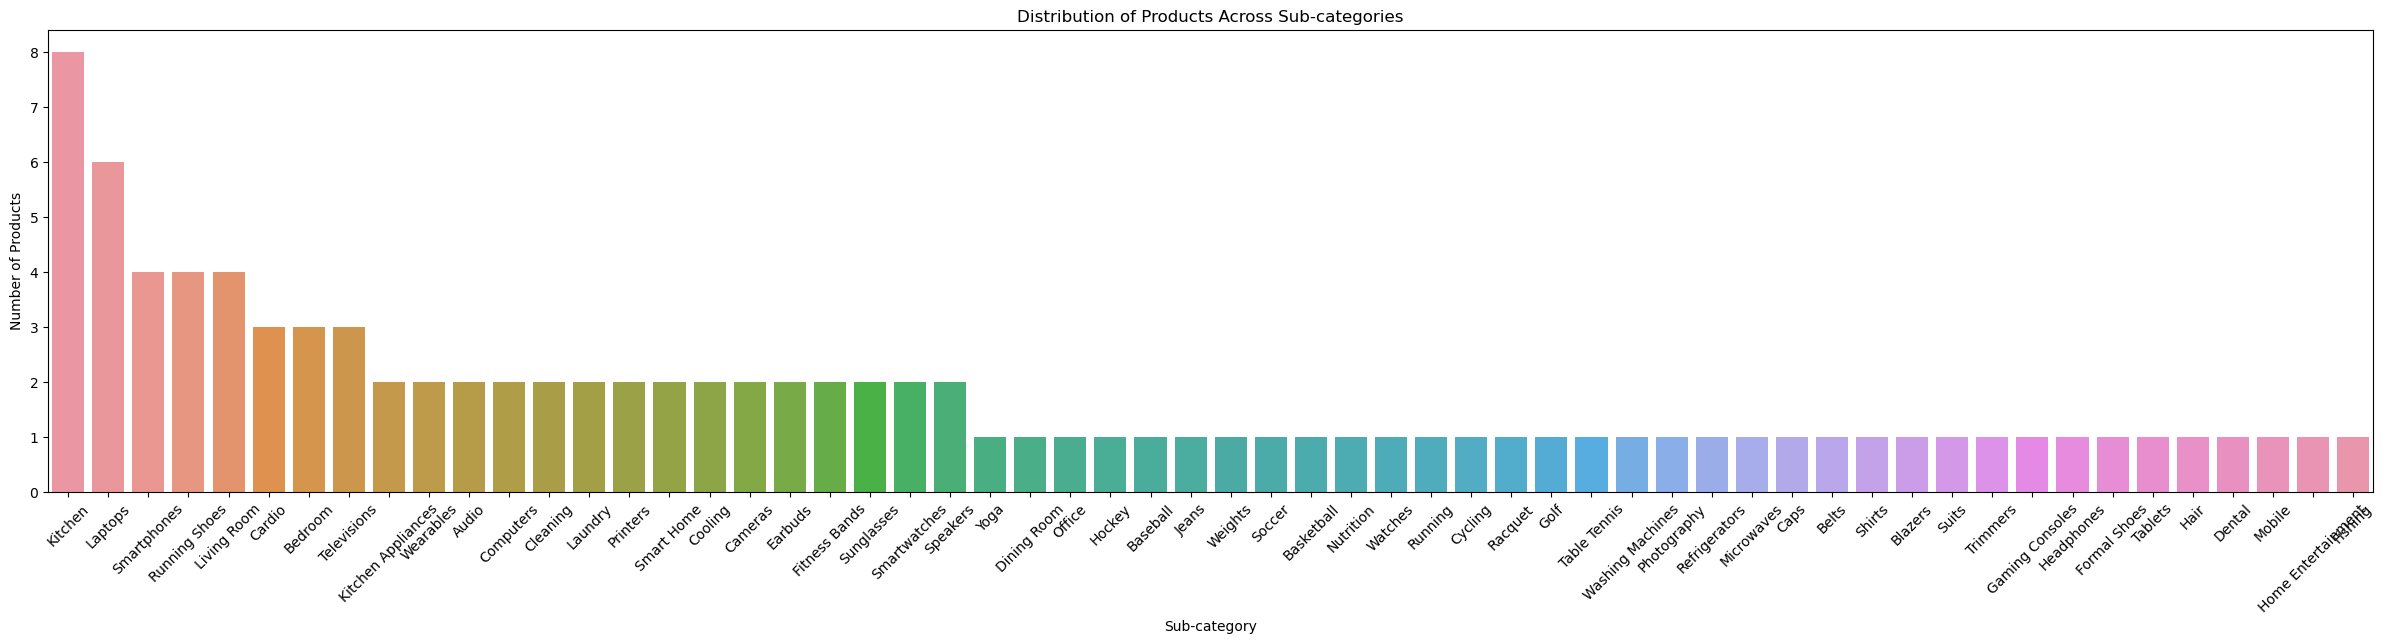

In [51]:
products_by_subcategory = product_data['sub_category'].value_counts()

plt.figure(figsize=(30, 6))
sns.barplot(x=products_by_subcategory.index, y=products_by_subcategory.values)
plt.title('Distribution of Products Across Sub-categories')
plt.xlabel('Sub-category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


In [57]:
#Products with Low Stock Levels

In [53]:
low_stock_products=product_data[product_data['stock'] < 20]

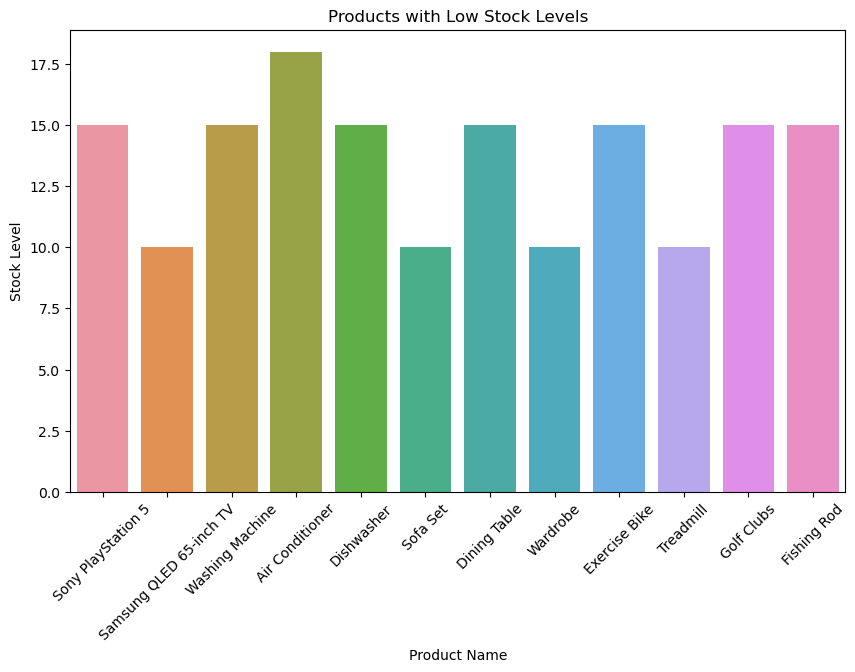

In [55]:

plt.figure(figsize=(10, 6))
sns.barplot(x=low_stock_products['product_name'], y=low_stock_products['stock'])
plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.show()


In [56]:
#Average, Maximum, and Minimum Prices for Products

In [64]:
avg_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()


In [65]:
print(f"Average Price: {avg_price:.2f} Rs")
print(f"Maximum Price: {max_price:.2f} Rs")
print(f"Minimum Price: {min_price:.2f} Rs")


Average Price: 23016.00 Rs
Maximum Price: 144999.00 Rs
Minimum Price: 399.00 Rs


#### Order Analysis 

In [66]:
#Top 10 Orders Product-wise

In [77]:
top_10_orders = order_data['product_id'].value_counts().head(10)
top_10_orders_names= top_10_orders.index.to_series().map(product_data.set_index('product_id')['product_name'])
plot_data = pd.DataFrame({
    'Product Name': top_10_orders_names,
    'Number of Orders': top_10_orders.values
})

In [73]:
top_10_orders_names

product_id
PROD001    Samsung Galaxy S21
PROD064     Bluetooth Speaker
PROD074        Electric Grill
PROD073          Air Purifier
PROD072          Coffee Maker
PROD071               Blender
PROD070            Dishwasher
PROD069        Microwave Oven
PROD068            Headphones
PROD067        Digital Camera
Name: product_id, dtype: object

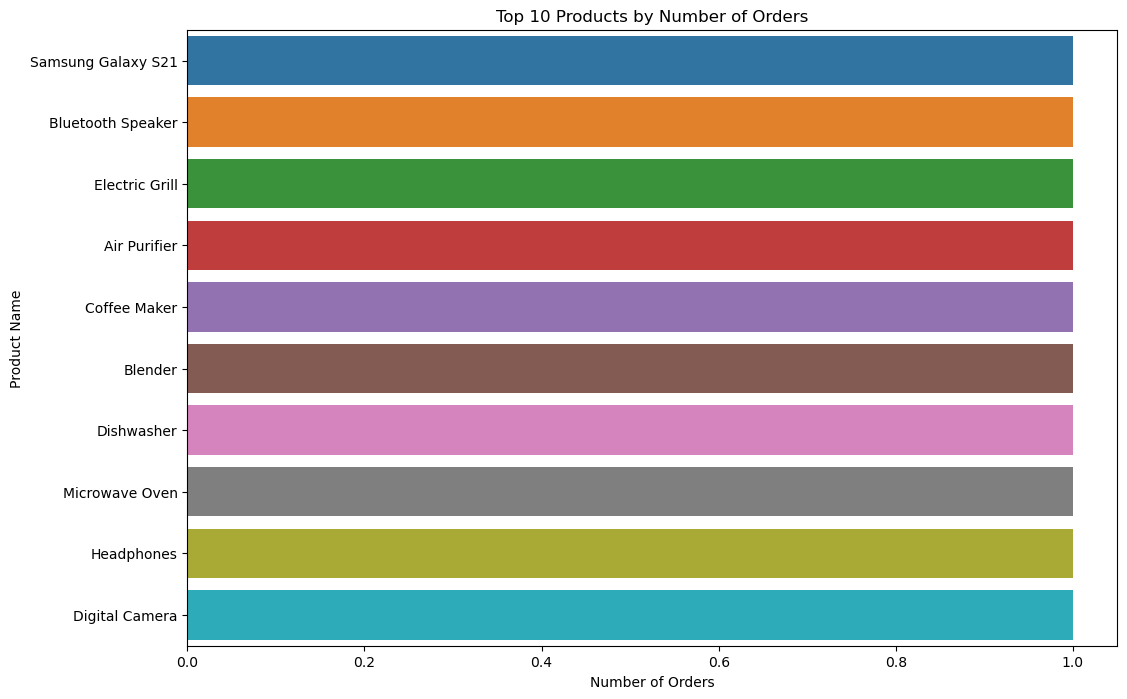

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Orders', y='Product Name', data=plot_data)
plt.title('Top 10 Products by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()



In [82]:
#order status distribution

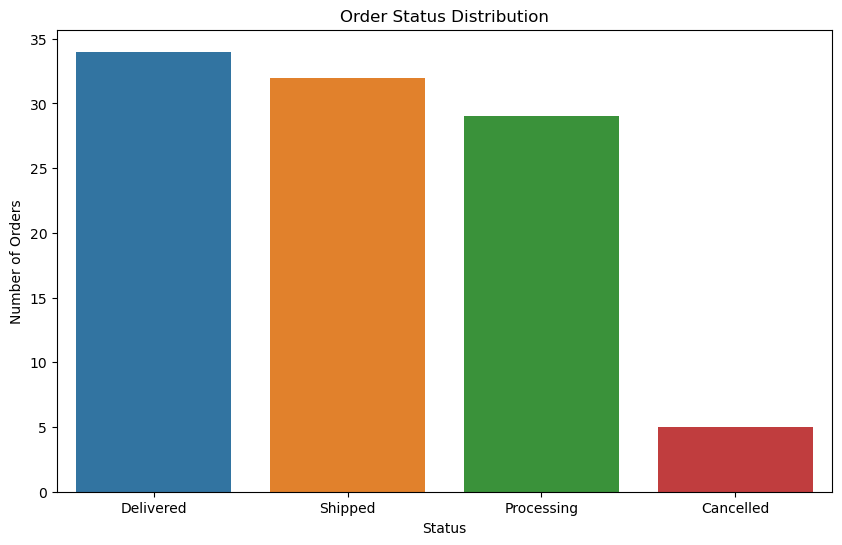

In [87]:
order_status_distribution = order_data['order_status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_distribution.index, y=order_status_distribution.values)
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()



In [89]:
order_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,CUST001,PROD001,1.0,64999.0,Credit Card,2024-08-01 10:00:00,Shipped
1,2,CUST002,PROD002,1.0,74999.0,Debit Card,2024-08-02 11:15:00,Delivered
2,3,CUST003,PROD003,1.0,57999.0,Net Banking,2024-08-03 12:30:00,Processing
3,4,CUST004,PROD004,1.0,94999.0,Credit Card,2024-08-04 13:45:00,Shipped
4,5,CUST005,PROD005,2.0,23998.0,Cash on Delivery,2024-08-05 14:00:00,Delivered
...,...,...,...,...,...,...,...,...
95,96,CUST096,PROD096,1.0,4499.0,Debit Card,2024-11-04 09:15:00,Shipped
96,97,CUST097,PROD097,1.0,139999.0,Cash on Delivery,2024-11-05 10:30:00,Delivered
97,98,CUST098,PROD098,1.0,144999.0,Net Banking,2024-11-06 11:45:00,Processing
98,99,CUST099,PROD099,1.0,12999.0,Credit Card,2024-11-07 12:00:00,Shipped


In [88]:
# Most Popular Products Based on Order Quantity

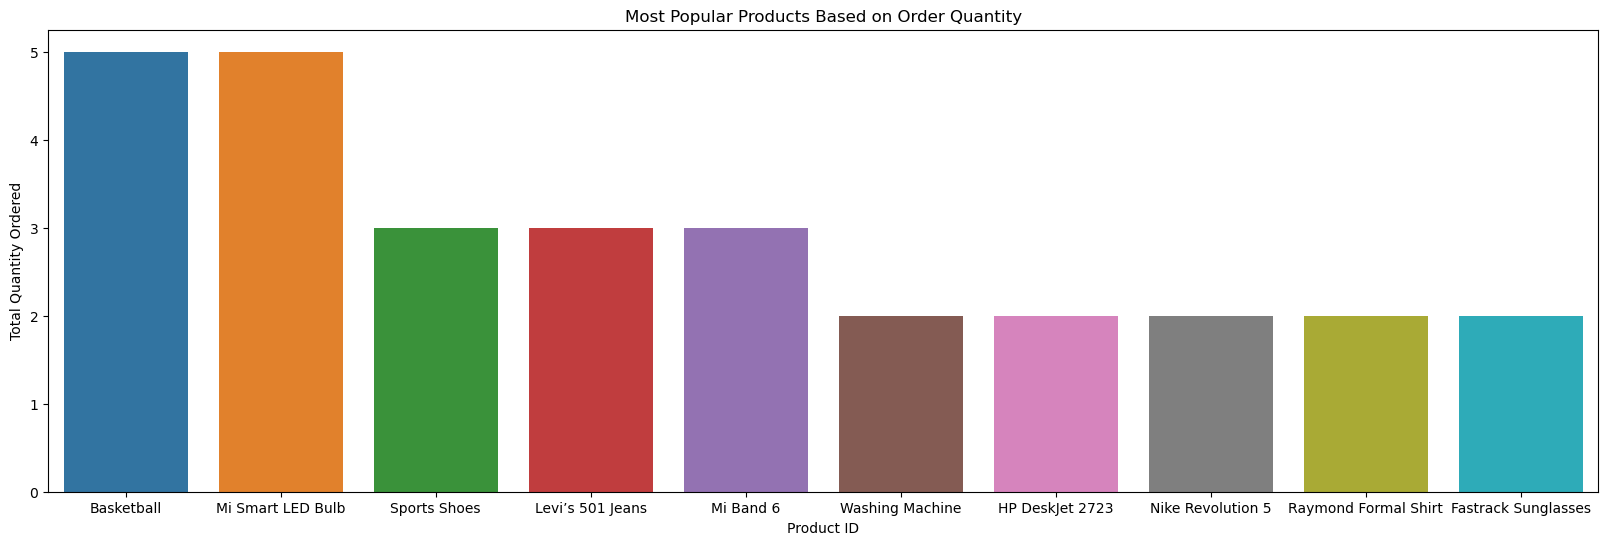

In [97]:
popular_products = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
popular_product_names= popular_products.index.to_series().map(product_data.set_index('product_id')['product_name'])
plot_product_data = pd.DataFrame({
    'Product Name': popular_product_names,
    'quantity': popular_products.values
})

plt.figure(figsize=(20, 6))
sns.barplot(x="Product Name", y="quantity" , data=plot_product_data)
plt.title('Most Popular Products Based on Order Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.show()


#### Sales Analysis 

In [98]:
#Total Revenue Generated from Orders Product-wise

In [99]:
order_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,CUST001,PROD001,1.0,64999.0,Credit Card,2024-08-01 10:00:00,Shipped
1,2,CUST002,PROD002,1.0,74999.0,Debit Card,2024-08-02 11:15:00,Delivered
2,3,CUST003,PROD003,1.0,57999.0,Net Banking,2024-08-03 12:30:00,Processing
3,4,CUST004,PROD004,1.0,94999.0,Credit Card,2024-08-04 13:45:00,Shipped
4,5,CUST005,PROD005,2.0,23998.0,Cash on Delivery,2024-08-05 14:00:00,Delivered
...,...,...,...,...,...,...,...,...
95,96,CUST096,PROD096,1.0,4499.0,Debit Card,2024-11-04 09:15:00,Shipped
96,97,CUST097,PROD097,1.0,139999.0,Cash on Delivery,2024-11-05 10:30:00,Delivered
97,98,CUST098,PROD098,1.0,144999.0,Net Banking,2024-11-06 11:45:00,Processing
98,99,CUST099,PROD099,1.0,12999.0,Credit Card,2024-11-07 12:00:00,Shipped


In [106]:
order_data['total_revenue'] = order_data['quantity'] * order_data['total_price'] 
revenue_by_product = order_data.groupby('product_id')['total_revenue'].sum()


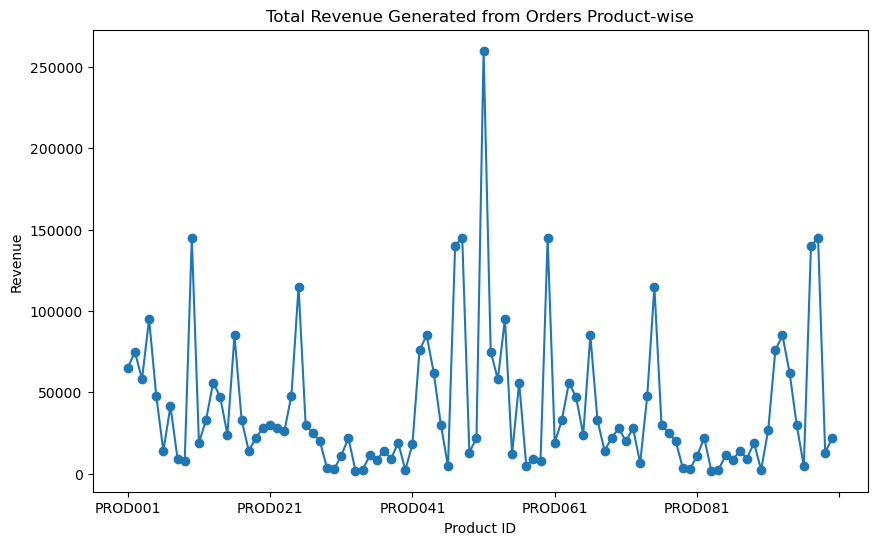

In [109]:
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='line', marker='o')
plt.title('Total Revenue Generated from Orders Product-wise')
plt.xlabel('Product ID')
plt.ylabel('Revenue')
plt.show()


In [113]:
# Total Revenue Generated from All Orders

In [112]:
total_revenue = order_data['total_revenue'].sum()
print(f"Total Revenue Generated from All Orders: {total_revenue:.2f} Rs")


Total Revenue Generated from All Orders: 4030575.00 Rs


In [114]:
# Total Revenue Product Category-wise Percentage

In [130]:
order_data.head(2)

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,total_revenue,category
0,1,CUST001,PROD001,1.0,64999.0,Credit Card,2024-08-01 10:00:00,Shipped,64999.0,Electronics
1,2,CUST002,PROD002,1.0,74999.0,Debit Card,2024-08-02 11:15:00,Delivered,74999.0,Electronics


In [131]:
product_data.head(2)

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,PROD001,Samsung Galaxy S21,Electronics,Smartphones,69999.0,64999.0,50
1,PROD002,Apple iPhone 13,Electronics,Smartphones,79999.0,74999.0,40


In [132]:
#joining the data 
order_data['category'] = order_data['product_id'].map(product_data.set_index('product_id')['category'])

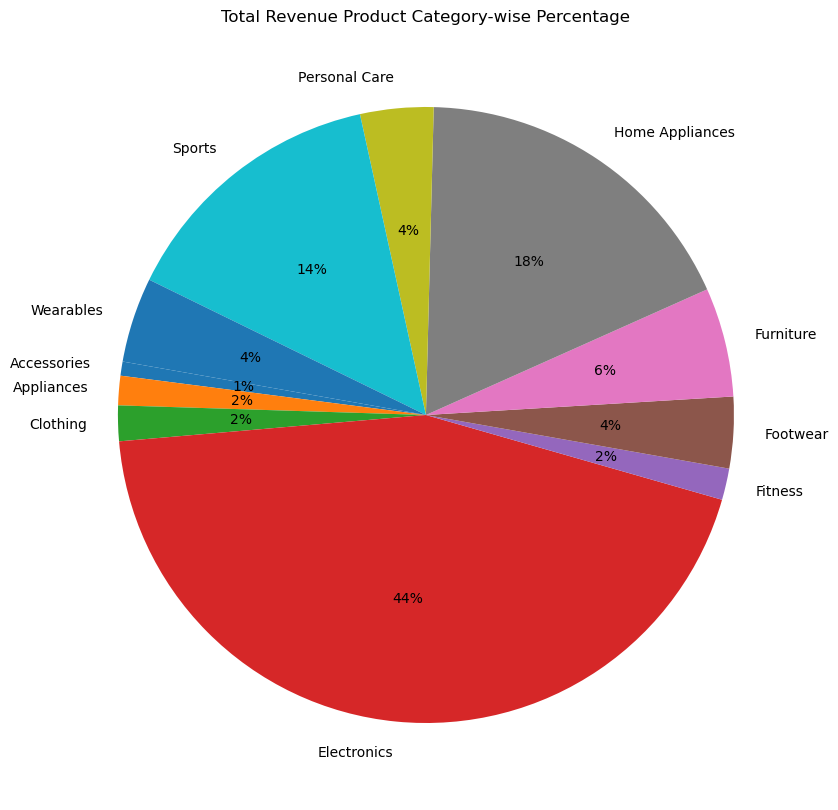

In [129]:
revenue_by_category = order_data.groupby('category')['total_revenue'].sum()
revenue_by_category_percentage = (revenue_by_category / total_revenue) * 100

plt.figure(figsize=(20, 10))
plt.pie(revenue_by_category_percentage, labels=revenue_by_category.index, autopct='%1.0f%%',startangle=170)

plt.title('Total Revenue Product Category-wise Percentage')
plt.ylabel('')
plt.show()


In [133]:
# Performance of Different Product Categories in Terms of Sales

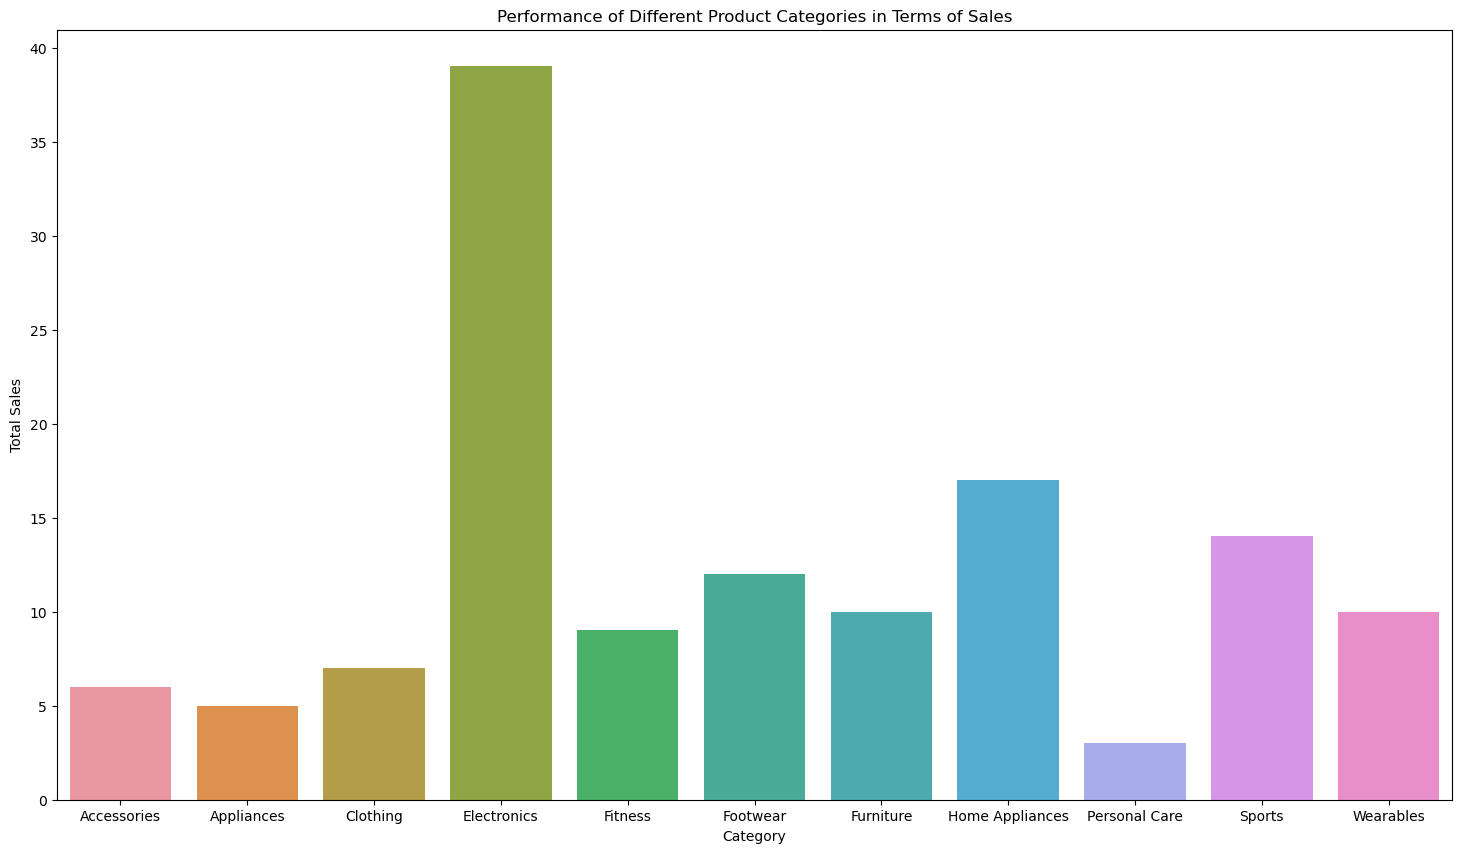

In [138]:
sales_by_category = order_data.groupby('category')['quantity'].sum()

plt.figure(figsize=(18, 10))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Performance of Different Product Categories in Terms of Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


In [139]:
#Most profitable product 

In [166]:
order_data=order_data.drop(columns=['original_price'])

In [167]:
# Map 'selling_price' and 'product_name' from product_data to order_data
#order_data = order_data.merge(product_data[['product_id', 'product_name', 'selling_price']], on='product_id', how='left')
# Calculate profit
order_data['profit'] = order_data['total_revenue'] - (order_data['quantity'] * order_data['selling_price'])


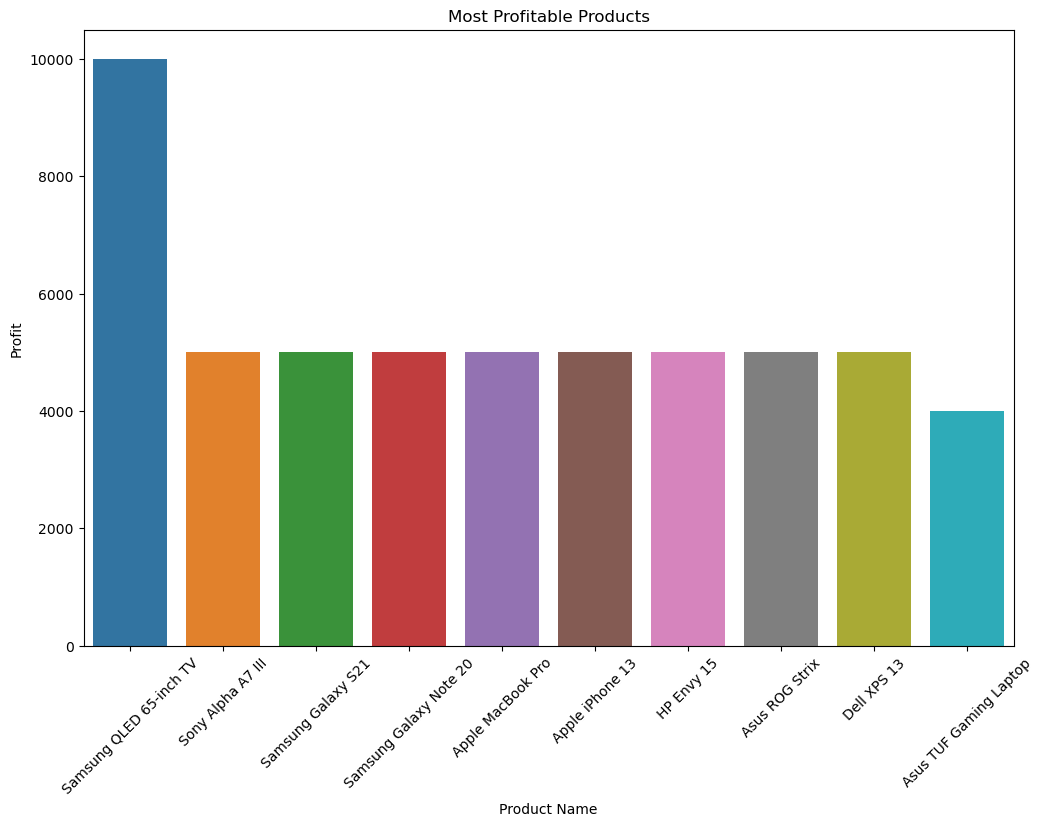

In [168]:

# Get the top 10 most profitable products
most_profitable_products = order_data.groupby('product_name_x')['profit'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=most_profitable_products.index, y=most_profitable_products.values)
plt.title('Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [169]:
most_profitable_products

product_name_x
Samsung QLED 65-inch TV    10000.0
Sony Alpha A7 III           5000.0
Samsung Galaxy S21          5000.0
Samsung Galaxy Note 20      5000.0
Apple MacBook Pro           5000.0
Apple iPhone 13             5000.0
HP Envy 15                  5000.0
Asus ROG Strix              5000.0
Dell XPS 13                 5000.0
Asus TUF Gaming Laptop      4000.0
Name: profit, dtype: float64

#### Customer Older Patterns 

In [170]:
#Product Names with the Highest and Lowest Order Quantities

In [172]:
product_order_quantities = order_data.groupby('product_id')['quantity'].sum()
highest_order_product = product_order_quantities.idxmax()
lowest_order_product = product_order_quantities.idxmin()

print(f"Highest Order Quantity Product: {highest_order_product}")
print(f"Lowest Order Quantity Product: {lowest_order_product}")

Highest Order Quantity Product: PROD045
Lowest Order Quantity Product: PROD001


In [173]:
# Customers with the Highest and Lowest Order Quantities

In [175]:
customer_order_quantities = order_data.groupby('customer_id')['quantity'].sum()
highest_order_customer = customer_order_quantities.idxmax()
lowest_order_customer = customer_order_quantities.idxmin()

print(f"Highest Order Quantity Customer: {highest_order_customer}")
print(f"Lowest Order Quantity Customer: {lowest_order_customer}")


Highest Order Quantity Customer: CUST045
Lowest Order Quantity Customer: CUST001


In [176]:
#Most Preferred Payment Modes

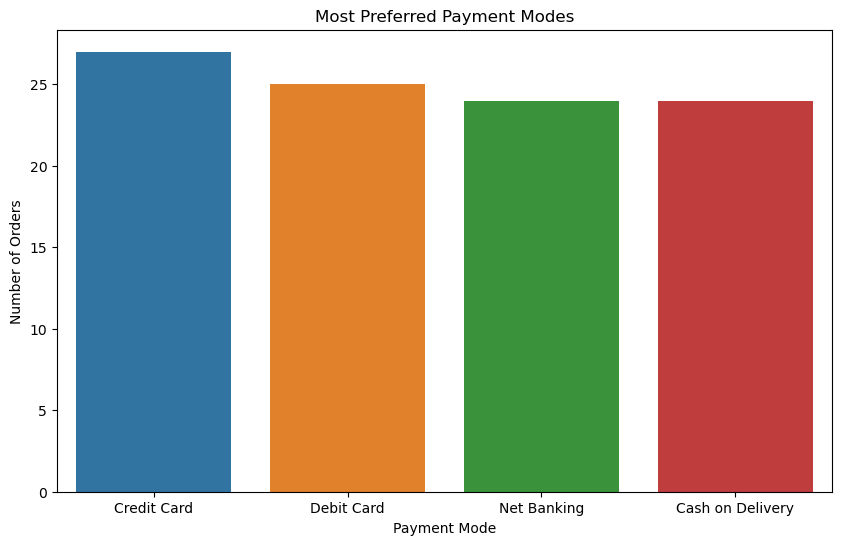

In [177]:
preferred_payment_modes = order_data['payment_mode'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_payment_modes.index, y=preferred_payment_modes.values)
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.show()


#### Time-based Analysis

In [178]:
#Month-wise Total Sales

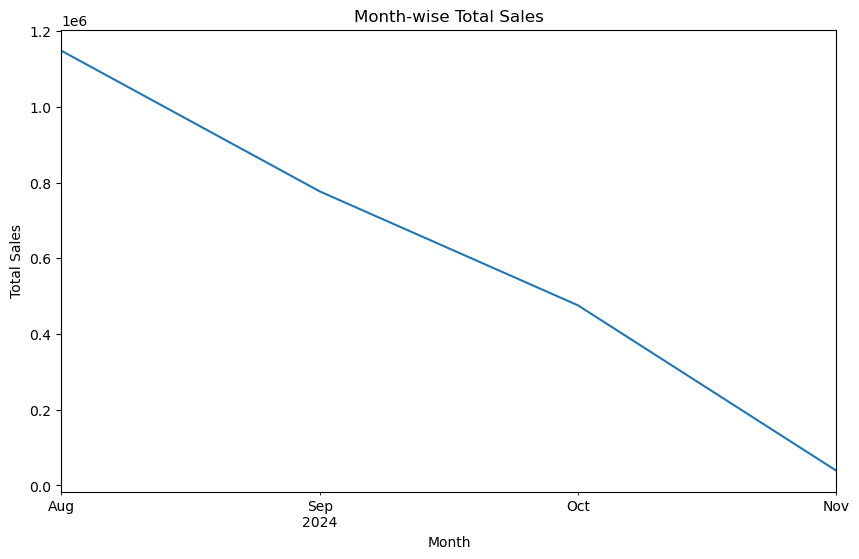

In [179]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])  # Assuming 'order_date' is in order_df
monthly_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_revenue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [180]:
#Month and Year-wise Total Sales

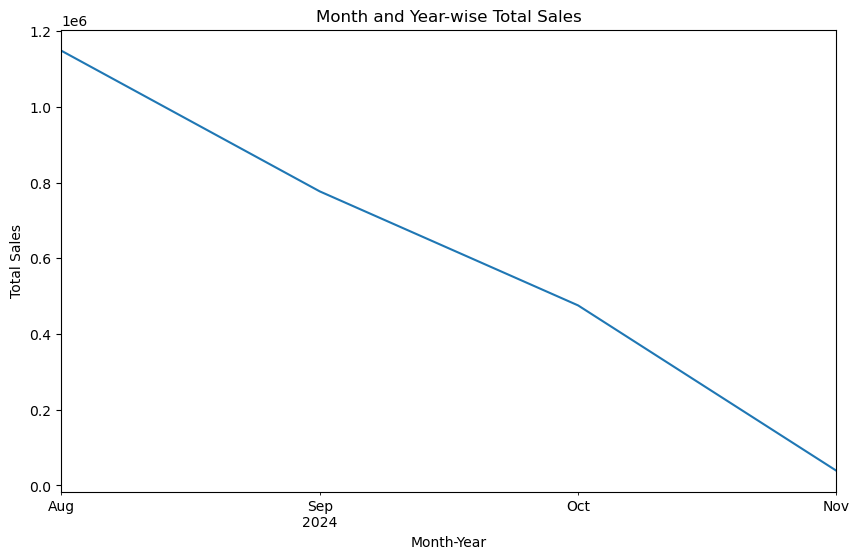

In [182]:
monthly_yearly_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_revenue'].sum()

plt.figure(figsize=(10, 6))
monthly_yearly_sales.plot()
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.show()


In [184]:
#Peak Order Date

In [183]:
peak_order_date = order_data.groupby('order_date')['quantity'].sum().idxmax()
print(f"Peak Order Date: {peak_order_date}")


Peak Order Date: 2024-09-14 12:00:00


#### Geographical Analysis

In [185]:
#Distribution of Customers Across Different Cities

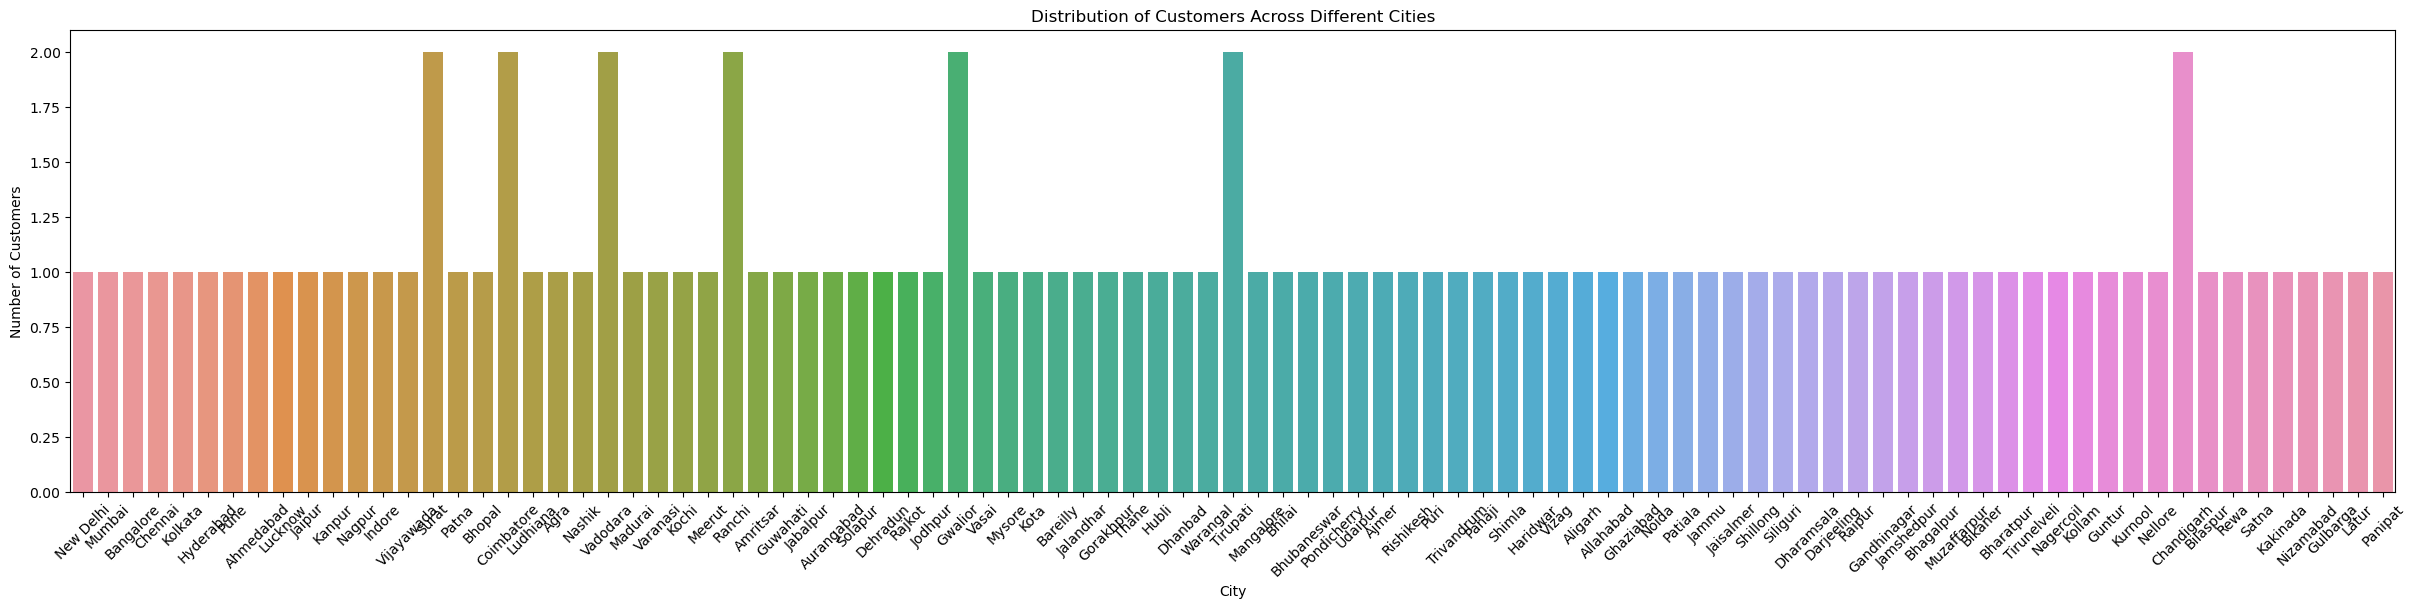

In [187]:
plt.figure(figsize=(30, 6))
sns.countplot(data=customer_data, x='city')
plt.title('Distribution of Customers Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [193]:
customer_data

,customer_id,name,city,email,phone_no,address,pin_code
0,CUST001,Arjun Singh,New Delhi,arjun.singh@example.com,9876543210,"123, MG Road",110001
1,CUST002,Priya Sharma,Mumbai,priya.sharma@example.com,9988776655,"45, Lokhandwala Complex",400053
2,CUST003,Rahul Verma,Bangalore,rahul.verma@example.com,9123456789,"56, Indiranagar",560038
3,CUST004,Anjali Mehta,Chennai,anjali.mehta@example.com,9012345678,"12, T Nagar",600017
4,CUST005,Vikas Gupta,Kolkata,vikas.gupta@example.com,9876543201,"7, Salt Lake",700091
...,...,...,...,...,...,...,...
95,CUST096,Vimal Shah,Gulbarga,vimal.shah@example.com,9123456577,"78, Sedam Road",585105
96,CUST097,Aarti Yadav,Latur,aarti.yadav@example.com,9988776388,"12, Ausa Road",413512
97,CUST098,Suraj Patel,Panipat,suraj.patel@example.com,9876543020,"56, Model Town",132103
98,CUST099,Komal Bhatt,Surat,komal.bhatt@example.com,9876543010,"12, Piplod",395007


In [191]:
order_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,total_revenue,category,profit,product_name_x,selling_price
0,1,CUST001,PROD001,1.0,64999.0,Credit Card,2024-08-01 10:00:00,Shipped,69999.0,Electronics,5000.0,Samsung Galaxy S21,64999.0
1,2,CUST002,PROD002,1.0,74999.0,Debit Card,2024-08-02 11:15:00,Delivered,79999.0,Electronics,5000.0,Apple iPhone 13,74999.0
2,3,CUST003,PROD003,1.0,57999.0,Net Banking,2024-08-03 12:30:00,Processing,59999.0,Electronics,2000.0,Sony Bravia 55-inch TV,57999.0
3,4,CUST004,PROD004,1.0,94999.0,Credit Card,2024-08-04 13:45:00,Shipped,99999.0,Electronics,5000.0,Dell XPS 13,94999.0
4,5,CUST005,PROD005,2.0,23998.0,Cash on Delivery,2024-08-05 14:00:00,Delivered,12999.0,Footwear,-10999.0,Nike Air Max 270,11999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,CUST096,PROD096,1.0,4499.0,Debit Card,2024-11-04 09:15:00,Shipped,1999.0,Sports,200.0,Soccer Ball,1799.0
96,97,CUST097,PROD097,1.0,139999.0,Cash on Delivery,2024-11-05 10:30:00,Delivered,1299.0,Sports,100.0,Table Tennis Bat,1199.0
97,98,CUST098,PROD098,1.0,144999.0,Net Banking,2024-11-06 11:45:00,Processing,2999.0,Sports,200.0,Baseball Glove,2799.0
98,99,CUST099,PROD099,1.0,12999.0,Credit Card,2024-11-07 12:00:00,Shipped,3999.0,Sports,300.0,Hockey Stick,3699.0


In [189]:
#Popularity of Products or Categories in Specific Cities

In [194]:
order_data = order_data.merge(customer_data[['customer_id', 'city']], on='customer_id', how='left')

<Figure size 8000x800 with 0 Axes>

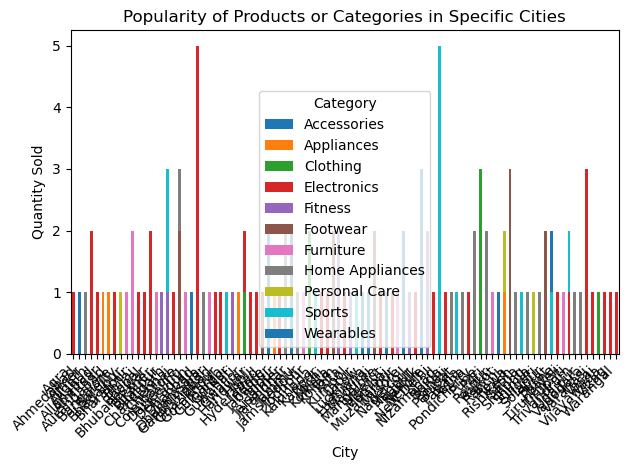

In [204]:
popular_products_by_city = order_data.groupby(['city', 'category'])['quantity'].sum().unstack()

# Increase figure size
plt.figure(figsize=(80, 8))

ax = popular_products_by_city.plot(kind='bar', stacked=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.title('Popularity of Products or Categories in Specific Cities')
plt.xlabel('City')
plt.ylabel('Quantity Sold')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

#### product performance 

In [212]:
# Top 10 Best-selling Products

In [211]:
order_data.head(2)

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,total_revenue,category,profit,product_name_x,selling_price,city
0,1,CUST001,PROD001,1.0,64999.0,Credit Card,2024-08-01 10:00:00,Shipped,69999.0,Electronics,5000.0,Samsung Galaxy S21,64999.0,New Delhi
1,2,CUST002,PROD002,1.0,74999.0,Debit Card,2024-08-02 11:15:00,Delivered,79999.0,Electronics,5000.0,Apple iPhone 13,74999.0,Mumbai


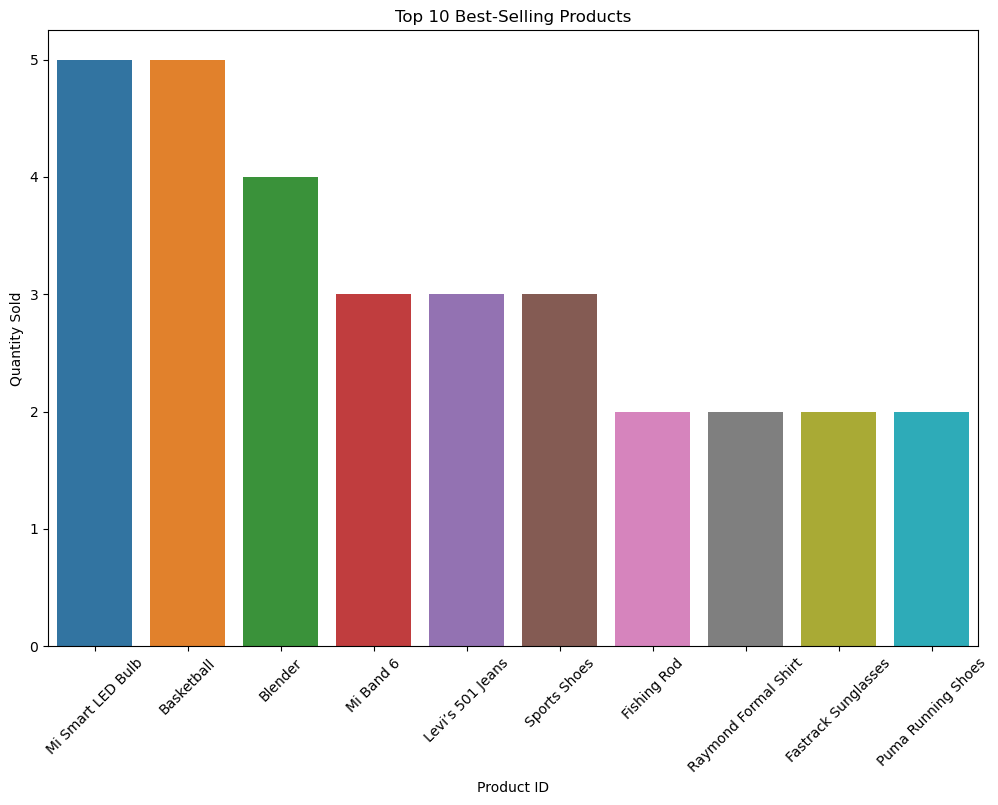

In [210]:
best_selling_products = order_data.groupby('product_name_x')['quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=best_selling_products.index, y=best_selling_products.values)

# Customize plot
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()